In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import re
import matplotlib.pyplot as plt 


# EDA
## 1. Initial Data Understanding

### Data Loading and Inspection

* 1 `pd.read_csv(r"path")`
* 2 `df.head()`
* 3 `df.shape`
---
### Data Types & Missing Values

* 1 `df.isna().sum()`
* 2 `df.info()`
---
### Duplicates

* 1 `df.duplicated().sum()`
* 2 `df.dropdublicates()`


In [139]:
df = pd.read_csv(r'../datas/raw_data/car_price_prediction.csv')

In [140]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [197]:
df.loc[2839]

ID                    45677283
Price                     8467
Levy                       658
Manufacturer             HONDA
Model                  Insight
Prod. year                2009
Category             Hatchback
Leather interior             0
Fuel type               Hybrid
Engine volume              1.3
Mileage                 155000
Cylinders                  4.0
Gear box type        Tiptronic
Drive wheels             Front
Wheel               Left wheel
Color                   Silver
Airbags                      8
Name: 2839, dtype: object

In [141]:
df.shape

(19237, 18)

In [142]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [144]:
df['Levy'].str.extract(r'(\D)').value_counts()

0
-    5819
Name: count, dtype: int64

In [145]:
df[df['Levy'].str.contains(r'\D')]['Levy']

2        -
9        -
11       -
12       -
23       -
        ..
19223    -
19224    -
19226    -
19229    -
19232    -
Name: Levy, Length: 5819, dtype: object

In [146]:
mask = df['Levy'].str.isnumeric()
df[~(mask)]['Levy'].value_counts()

Levy
-    5819
Name: count, dtype: int64

In [147]:
df['Levy'].replace('-',0 , inplace= True)

In [148]:
df['Levy'] = df.Levy.astype(int)

In [149]:
df['Engine volume'].str.extract(r'(\D)').value_counts()

0
.    14189
Name: count, dtype: int64

In [150]:
df[df['Engine volume'].str.contains(r'\D')]['Engine volume']

0              3.5
2              1.3
3              2.5
4              1.3
6              1.8
           ...    
19230          1.8
19231          3.5
19232    2.0 Turbo
19233          2.4
19236          2.4
Name: Engine volume, Length: 14189, dtype: object

In [151]:
clean_Engine = df['Engine volume'].str.extract(r'(\d*\.\d|\d)')
clean_Engine.shape

(19237, 1)

In [152]:
clean_Engine[0].str.contains(r'(\d*\.\d|\d)').sum()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_8056\2286308008.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  clean_Engine[0].str.contains(r'(\d*\.\d|\d)').sum()


np.int64(19237)

In [153]:
df['Engine volume'] = clean_Engine.astype('float')

In [154]:
maping = {'Yes' : 1 , 
          'No' : 0}
df['Leather interior'] = df['Leather interior'].map(maping)

In [155]:
df['Mileage'].str.extract(r"((?:\d+\skm))").isna().sum()

0    0
dtype: int64

In [156]:
df['Mileage'] = df['Mileage'].str.extract(r'(\d+)').astype('int')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  int64  
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  int64  
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [158]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19232    False
19233    False
19234    False
19235    False
19236    False
Length: 19237, dtype: bool

In [159]:
df.duplicated().sum()

np.int64(313)

In [160]:
df[df['ID'].duplicated(keep=False)].sort_values(by ='ID' ,ascending=True)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
7269,35464629,7840,1111,HONDA,FIT,2012,Hatchback,0,Petrol,1.3,108000,4.0,Automatic,Front,04-May,Right-hand drive,Blue,6
5754,35464629,7840,1111,HONDA,FIT,2012,Hatchback,0,Petrol,1.3,108000,4.0,Automatic,Front,04-May,Right-hand drive,Blue,6
1107,36559154,19726,0,MERCEDES-BENZ,Sprinter 411,2002,Goods wagon,0,Diesel,2.2,280000,4.0,Manual,Rear,02-Mar,Left wheel,White,2
6732,36559154,19726,0,MERCEDES-BENZ,Sprinter 411,2002,Goods wagon,0,Diesel,2.2,280000,4.0,Manual,Rear,02-Mar,Left wheel,White,2
9990,41770767,11917,0,NISSAN,Murano,2004,Jeep,1,CNG,3.5,233600,6.0,Variator,4x4,04-May,Left wheel,Silver,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15880,45815564,9408,0,MERCEDES-BENZ,E 240,2000,Sedan,0,Petrol,2.4,252000,6.0,Manual,Rear,04-May,Left wheel,Black,4
3756,45815994,4077,751,HYUNDAI,Sonata,2013,Sedan,1,Petrol,2.4,111930,4.0,Automatic,Front,04-May,Left wheel,Silver,12
14469,45815994,4077,751,HYUNDAI,Sonata,2013,Sedan,1,Petrol,2.4,111930,4.0,Automatic,Front,04-May,Left wheel,Silver,12
1171,45816384,49237,730,HYUNDAI,Tucson,2016,Jeep,1,Petrol,1.6,27000,4.0,Tiptronic,4x4,04-May,Left wheel,White,12


In [161]:
df[df['ID'].duplicated()].sort_values(by ='ID' ,ascending=True)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
7269,35464629,7840,1111,HONDA,FIT,2012,Hatchback,0,Petrol,1.3,108000,4.0,Automatic,Front,04-May,Right-hand drive,Blue,6
6732,36559154,19726,0,MERCEDES-BENZ,Sprinter 411,2002,Goods wagon,0,Diesel,2.2,280000,4.0,Manual,Rear,02-Mar,Left wheel,White,2
13822,41770767,11917,0,NISSAN,Murano,2004,Jeep,1,CNG,3.5,233600,6.0,Variator,4x4,04-May,Left wheel,Silver,6
9275,42412373,15367,781,CHEVROLET,Trax,2018,Jeep,1,Petrol,1.4,1405,4.0,Automatic,4x4,04-May,Left wheel,Black,8
8177,42444388,32929,0,CHEVROLET,Equinox,2016,Jeep,0,Petrol,2.4,57600,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,1,Petrol,3.5,80856,6.0,Automatic,4x4,04-May,Left wheel,Black,12
18757,45815551,11290,642,VOLKSWAGEN,Passat,2012,Sedan,1,Diesel,2.0,97070,4.0,Tiptronic,Front,04-May,Left wheel,Grey,12
15880,45815564,9408,0,MERCEDES-BENZ,E 240,2000,Sedan,0,Petrol,2.4,252000,6.0,Manual,Rear,04-May,Left wheel,Black,4
14469,45815994,4077,751,HYUNDAI,Sonata,2013,Sedan,1,Petrol,2.4,111930,4.0,Automatic,Front,04-May,Left wheel,Silver,12


In [162]:
df.drop_duplicates(inplace=True)

In [163]:
df.shape

(18924, 18)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int64  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  int64  
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17


## 2. Basic Statistical Overview

### Summary Statistics 
* `1 describe()`
* `2 value_counts()`
---
### Find out Zero and Constant Values



In [165]:
df.describe()

,ID,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,632.886493,2010.914236,0.725587,2.304349,1.555373e+06,4.580216,6.568379
std,9.375468e+05,1.921356e+05,568.273736,5.665749,0.446230,0.858536,4.880221e+07,1.200223,4.322323
min,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,0.000000,2009.000000,0.000000,1.800000,7.019575e+04,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,642.000000,2012.000000,1.000000,2.000000,1.264000e+05,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,917.000000,2015.000000,1.000000,2.500000,1.891198e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,1.000000,7.300000,2.147484e+09,16.000000,16.000000


In [166]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [167]:
df.select_dtypes(include='object').describe()

,Manufacturer,Model,Category,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
count,18924,18924,18924,18924,18924,18924,18924,18924,18924
unique,65,1590,11,7,4,3,3,2,16
top,HYUNDAI,Prius,Sedan,Petrol,Automatic,Front,04-May,Left wheel,Black
freq,3729,1069,8600,9944,13282,12695,18032,17471,4944


In [168]:
def top_bottom_combined(df , col , n=5):
    top_counts = df[col].value_counts().head(n)
    
    bottom_counts = df[col].value_counts().tail(n)
    combined = pd.concat([top_counts , bottom_counts] , axis=0)

    return combined

for col in df.select_dtypes(include= 'object').columns:
    print(f'{col} value counts : ')
    print(top_bottom_combined(df , col))
    print(f'30 unique values :  {df[col].unique()[:30]}')
    print('-'*50)

Manufacturer value counts : 
Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
LAMBORGHINI         1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, dtype: int64
30 unique values :  ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ']
--------------------------------------------------
Model value counts : 
Model
Prius               1069
Sonata              1067
Camry                929
Elantra              910
E 350                534
Vito Exstralong        1
Versa SE               1
Fusion HYBRID SE       1
C30                    1
Optima k5              1
Name: count, dtype: int64
30 unique values :  ['RX 450' 'Equinox' 'FIT' 'Escape' 'Sant

In [169]:
df.drop(columns='Doors' , inplace=True)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int64  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  int64  
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64  
dty

In [171]:
def fix_datatype(df , col):
    if df[col].dtype == 'object':
        df[col] = df[col].astype('string')


In [172]:
for col in df.columns:
    fix_datatype(df,col)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int64  
 3   Manufacturer      18924 non-null  string 
 4   Model             18924 non-null  string 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  string 
 7   Leather interior  18924 non-null  int64  
 8   Fuel type         18924 non-null  string 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  string 
 13  Drive wheels      18924 non-null  string 
 14  Wheel             18924 non-null  string 
 15  Color             18924 non-null  string 
 16  Airbags           18924 non-null  int64  
dty


## 3. Distribution of Variables
---
### Numerical Features (histograms, KDE)
* 1 `sns.histplot()`
* 2 `sns.kdeplot()`
* 3 after trsform => `np.log1p(df[col])`
---
### Categorical Features (bar plots, check imbalancement)
* 1 `sns.barplot()`
---
## Outlier detection



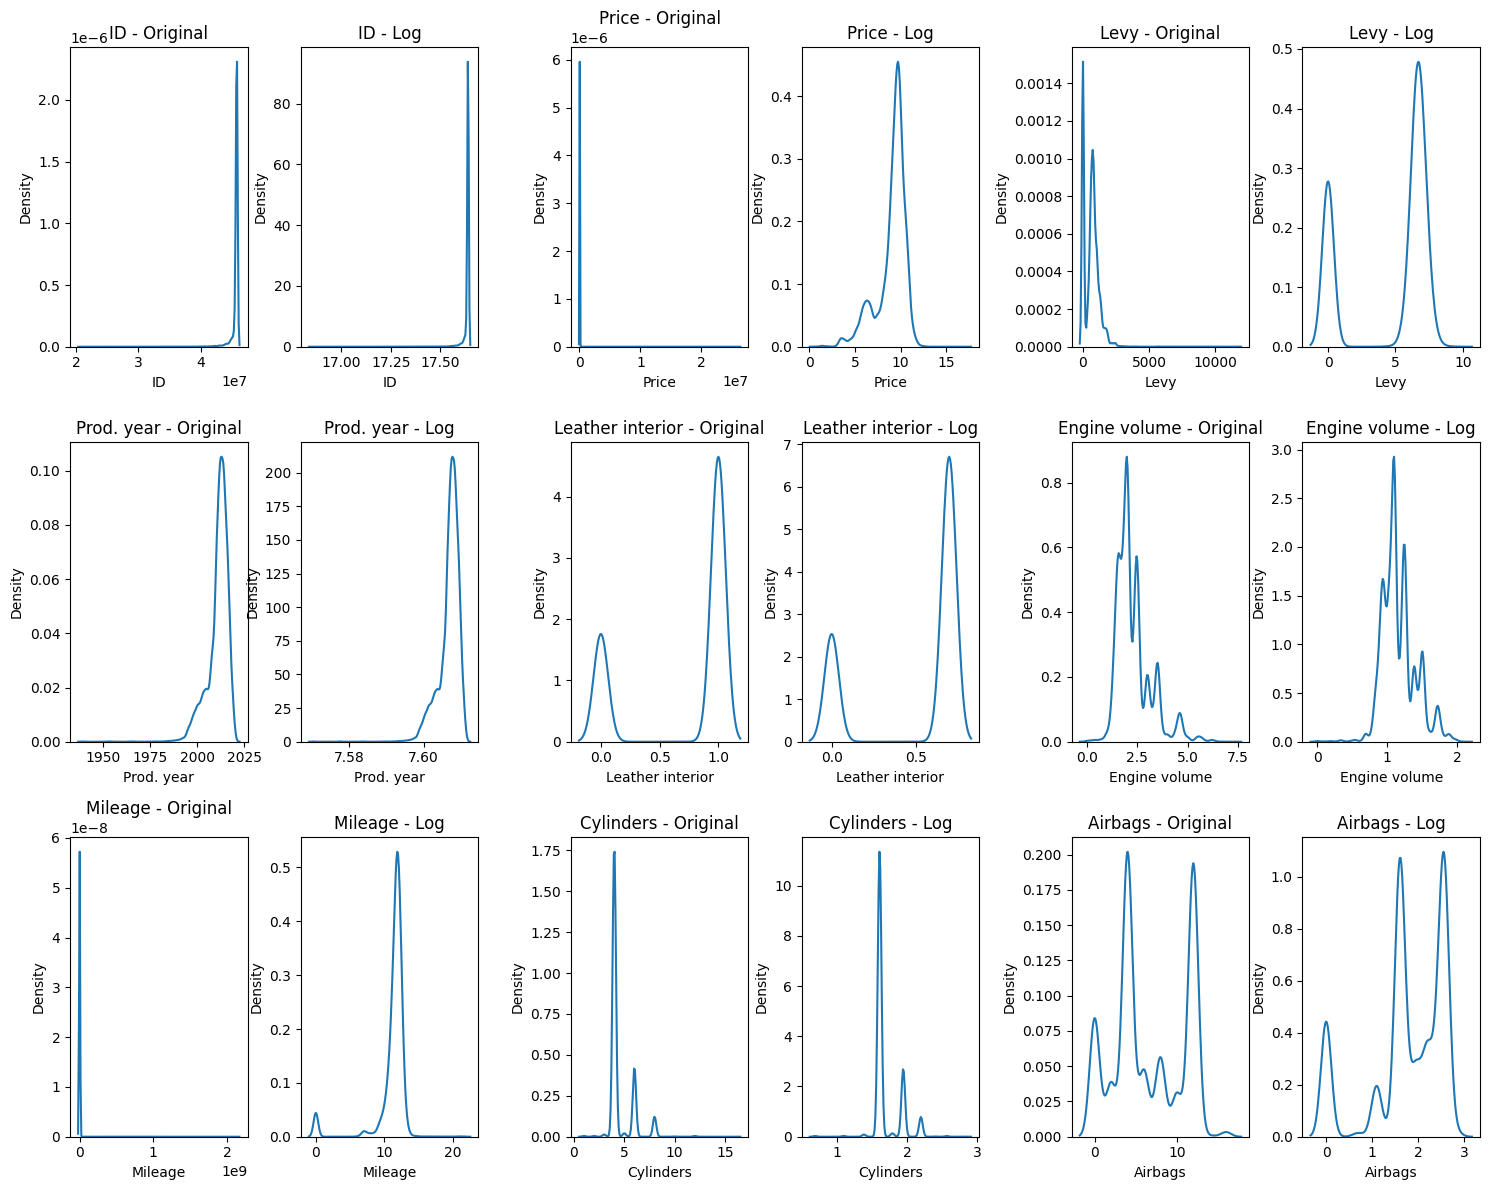

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_cols = df.select_dtypes(include='number').columns

fig = plt.figure(figsize=(15, 12))
outer = fig.add_gridspec(3, 3)  # الشكل الرئيسي 3×3

for i, col in enumerate(num_cols[:9]):  # لو عندك أكتر من 9 أعمدة
    inner = outer[i].subgridspec(1, 2, wspace=0.3)  # كل مربع ينقسم لـ 1×2
    
    ax1 = fig.add_subplot(inner[0])
    ax2 = fig.add_subplot(inner[1])
    
    # الرسم الأصلي
    sns.kdeplot(df[col], ax=ax1)
    ax1.set_title(f'{col} - Original')
    
    # الرسم بعد Log
    sns.kdeplot(np.log1p(df[col]), ax=ax2)
    ax2.set_title(f'{col} - Log')

plt.tight_layout()
plt.show()

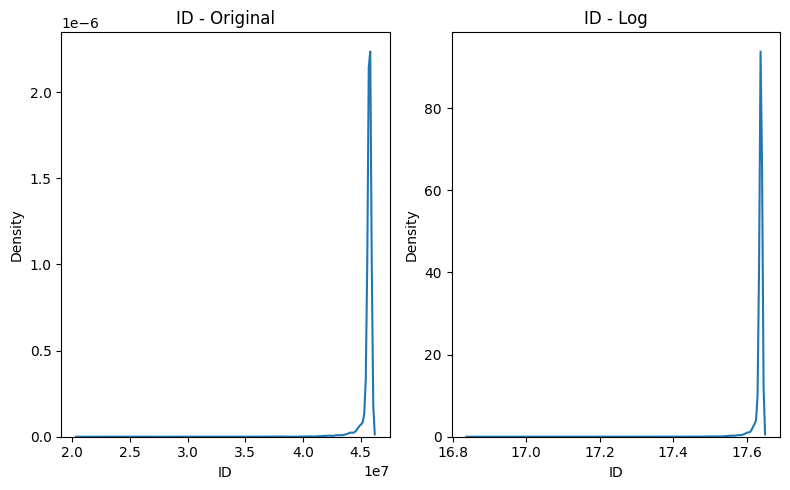

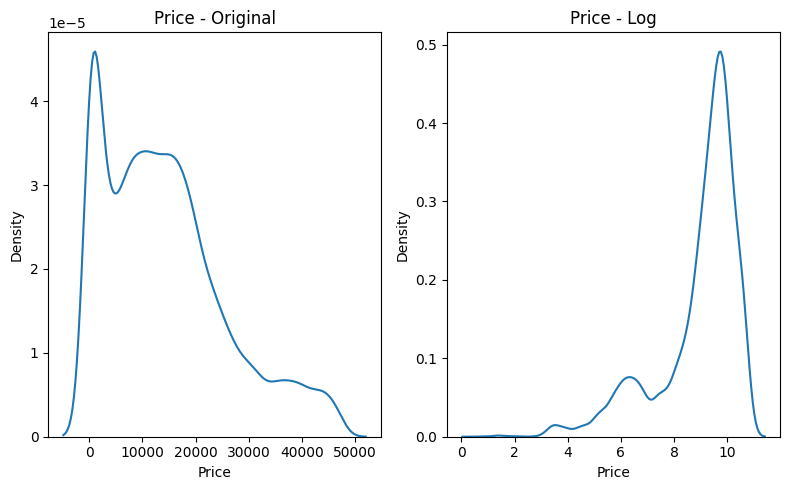

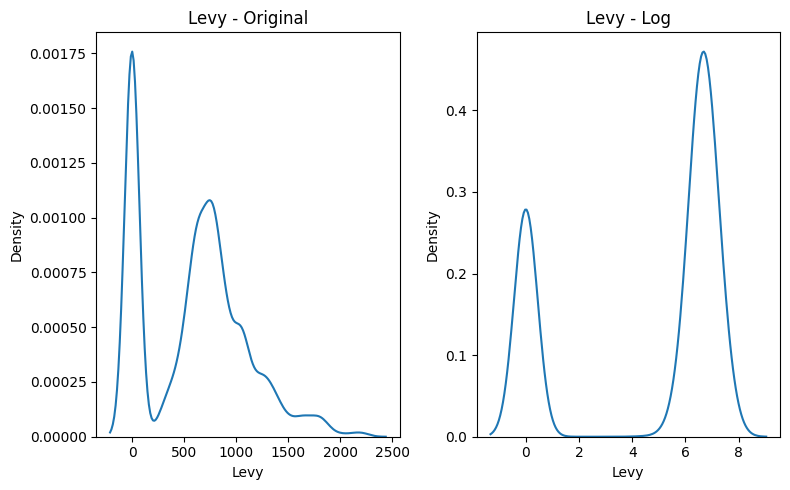

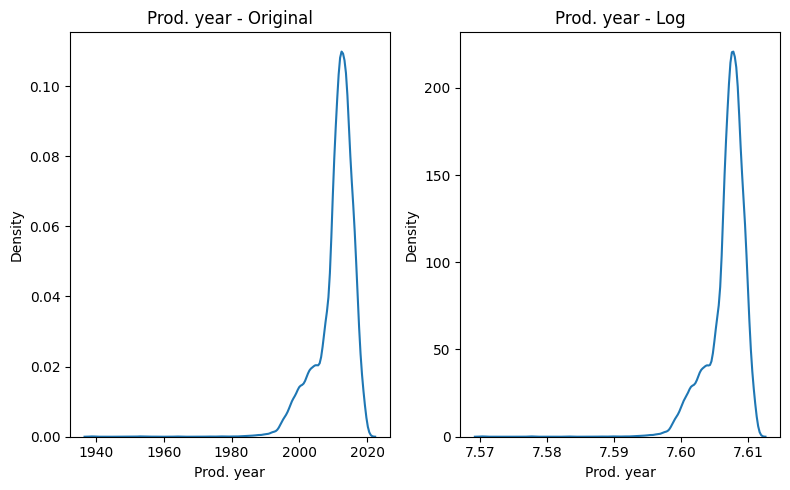

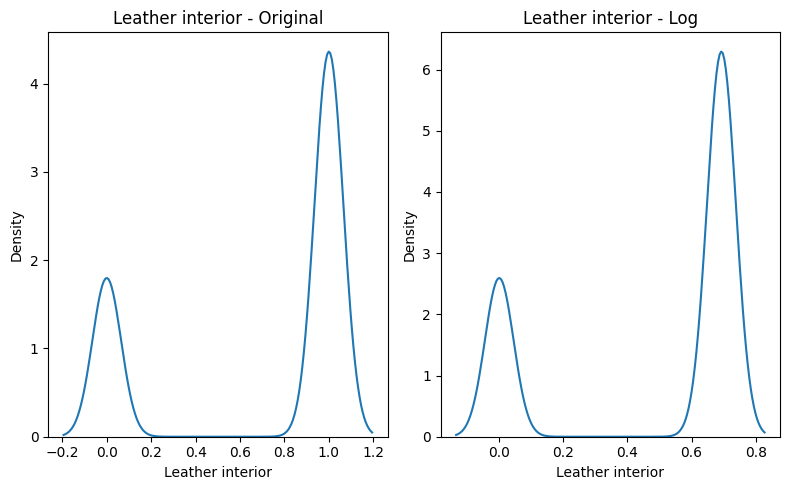

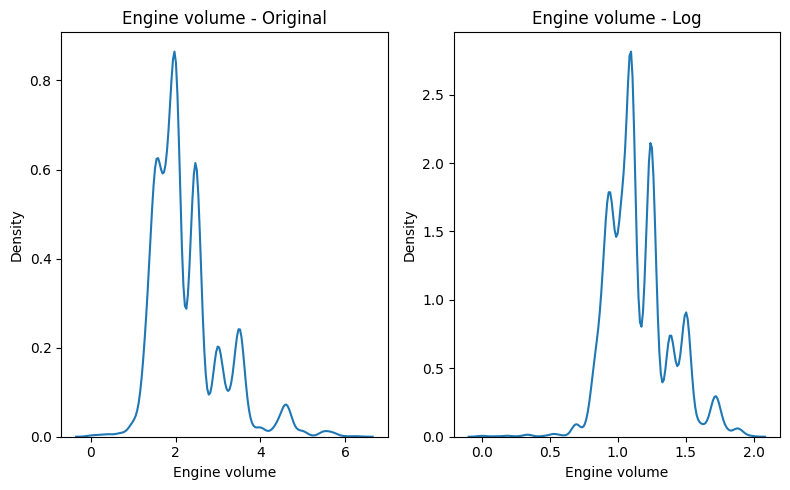

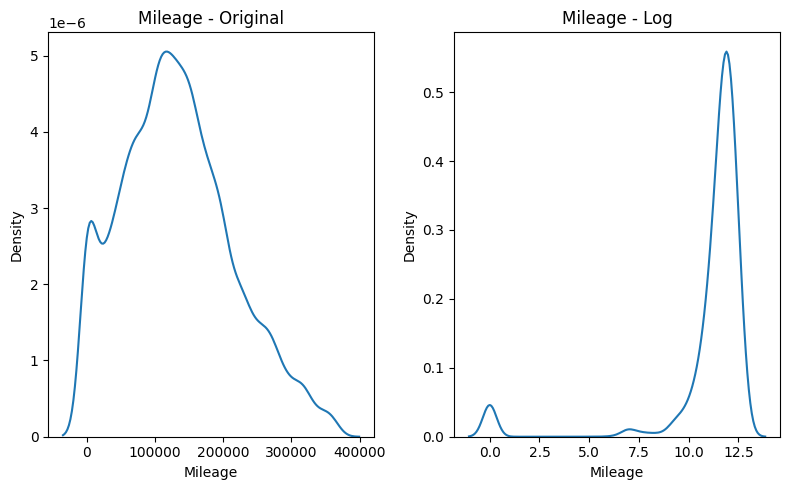

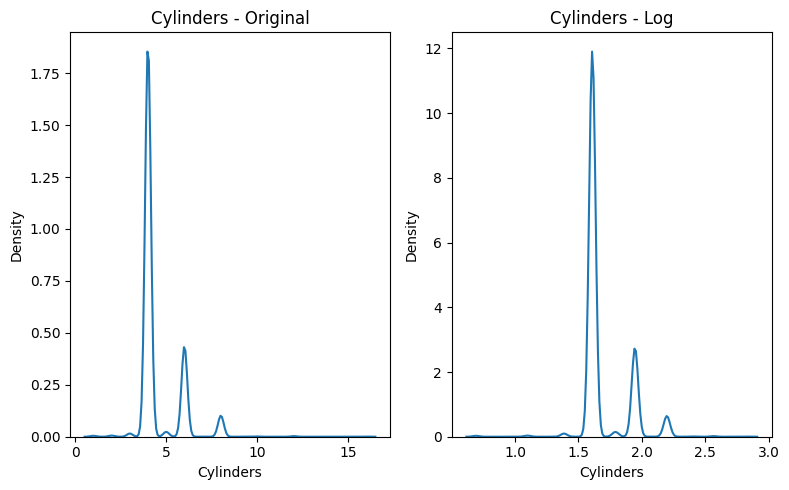

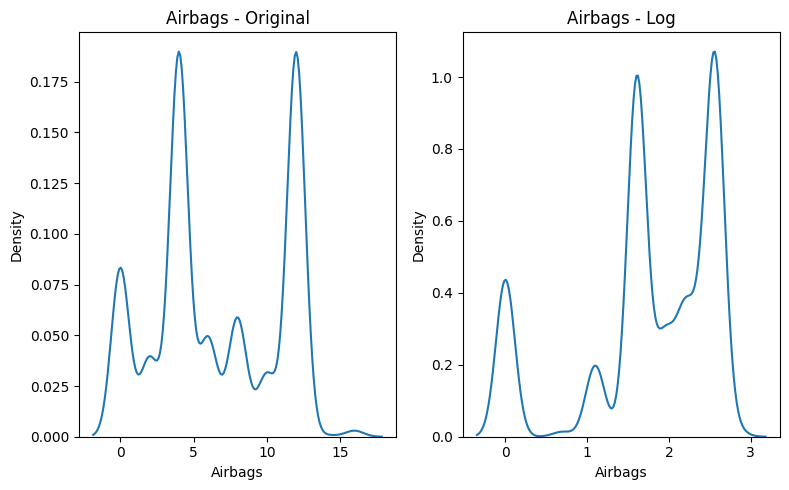

In [196]:
for col in df.select_dtypes(include='number').columns:
    fig,ax = plt.subplots(1,2,figsize= (8,5))
    sns.kdeplot(df[col], ax=ax[0])
    ax[0].set_title(f'{col} - Original')
    sns.kdeplot(np.log1p(df[col]), ax=ax[1])
    ax[1].set_title(f'{col} - Log')

    plt.tight_layout()
    plt.show()


## 4. Correlations

## Numerical Correlations (corr())
* 1 `df.corr(numeric_only = True)`
* 2 `sns.heatmap(data = df.corr(numeric_only=True) , annot=True )`
---
## Categorical Correlations



In [176]:
df.corr(numeric_only=True)

,ID,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Airbags
ID,1.000000,-0.000797,0.103477,0.072030,0.098480,-0.013902,0.004225,-0.040617,-0.022070
Price,-0.000797,1.000000,-0.003558,0.012689,0.000551,0.009183,-0.001763,0.007435,-0.012709
Levy,0.103477,-0.003558,1.000000,0.362827,0.331553,0.367129,-0.021203,0.251632,0.125015
Prod. year,0.072030,0.012689,0.362827,1.000000,0.388608,-0.034354,-0.064058,-0.099443,0.235160
Leather interior,0.098480,0.000551,0.331553,0.388608,1.000000,0.276417,-0.034682,0.199716,0.161889
Engine volume,-0.013902,0.009183,0.367129,-0.034354,0.276417,1.000000,-0.006377,0.795550,0.228235
Mileage,0.004225,-0.001763,-0.021203,-0.064058,-0.034682,-0.006377,1.000000,-0.001720,-0.009174
Cylinders,-0.040617,0.007435,0.251632,-0.099443,0.199716,0.795550,-0.001720,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.125015,0.235160,0.161889,0.228235,-0.009174,0.174112,1.000000


<Axes: >

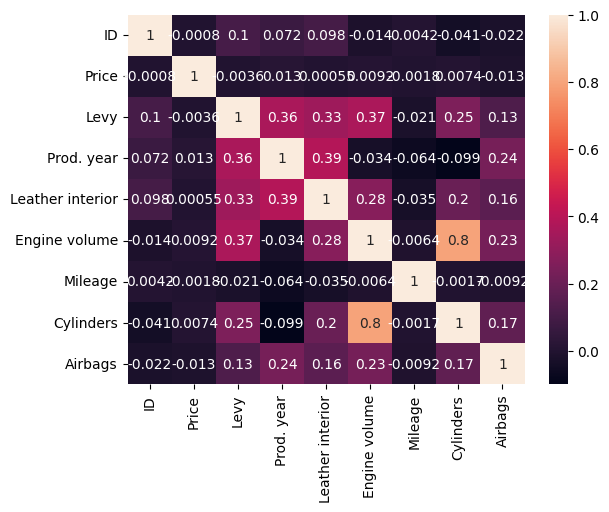

In [177]:
sns.heatmap(data = df.corr(numeric_only=True) , annot=True )


## 5. Feature Interactions

### Scatter Plots ( sns.pairplot() )
* 1 sns.pairplot(df[:100] )

* 2 boxplot , boxenplot
* 3 clean outliers ( quantile() )


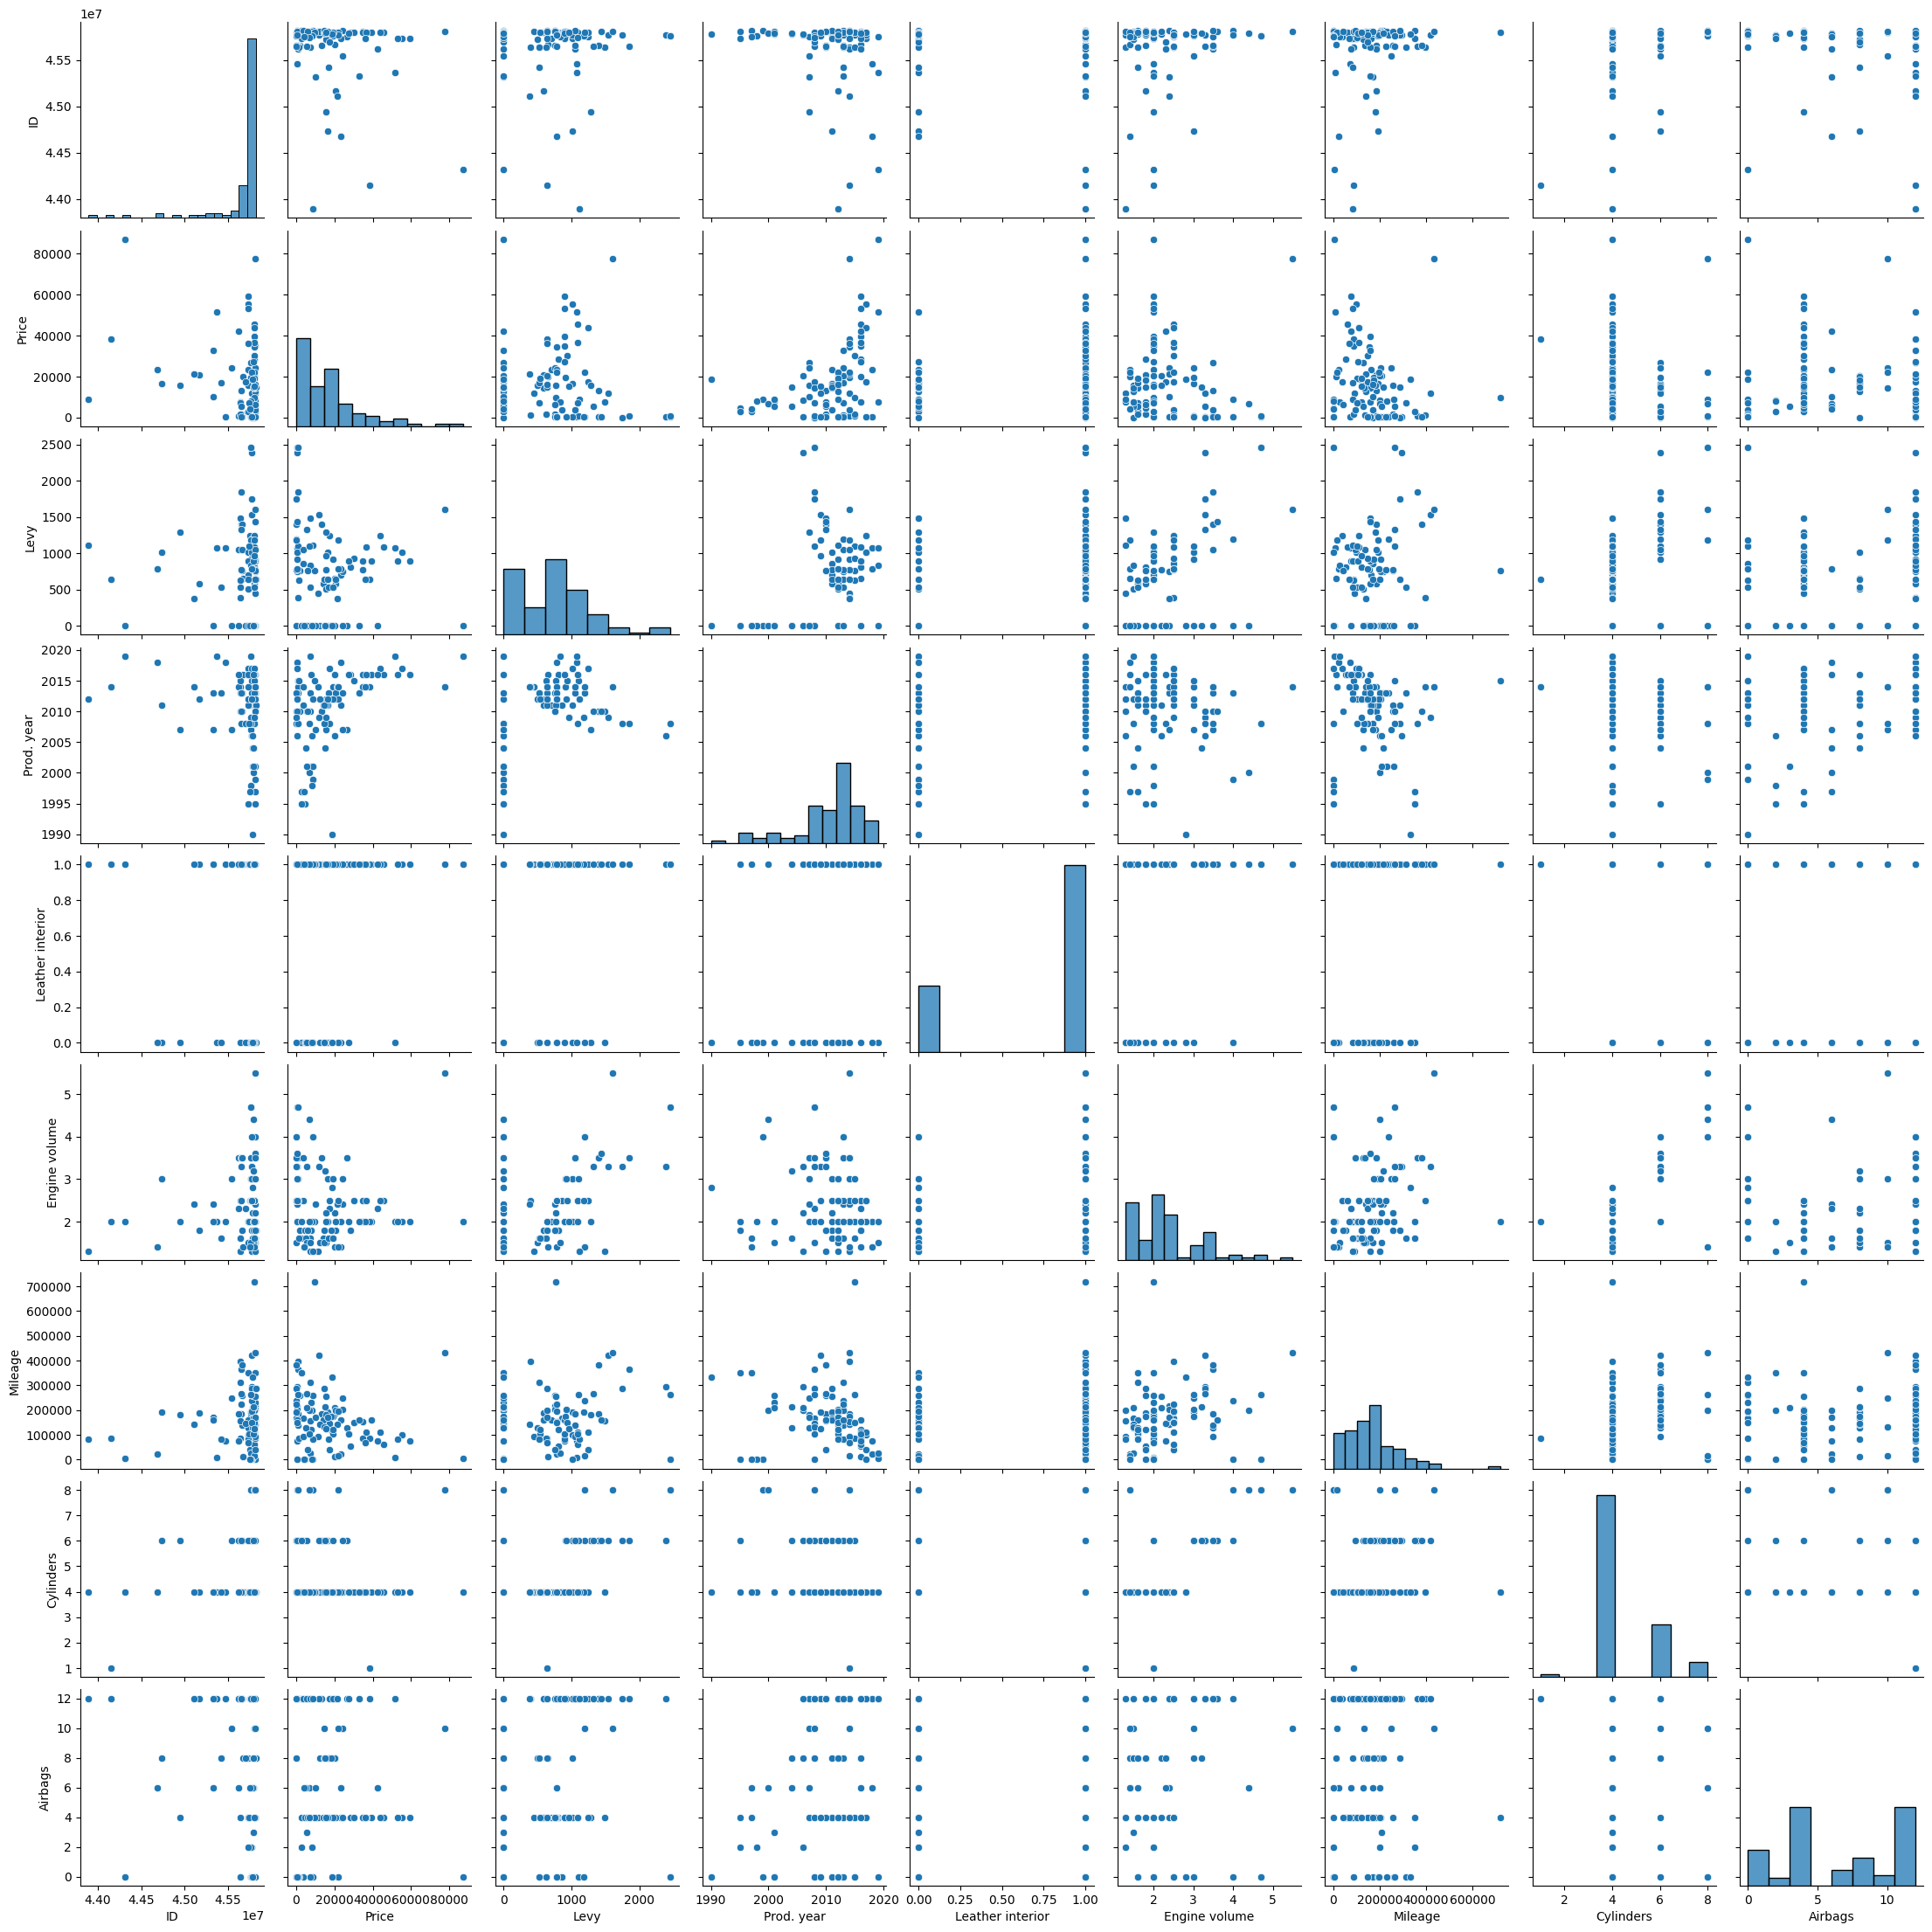

In [178]:
sns.pairplot(df[:100] )
plt.show()

In [179]:
num_col = np.delete(df.select_dtypes(include='number').columns.to_numpy() , [0,4])
num_col

array(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage',
       'Cylinders', 'Airbags'], dtype=object)

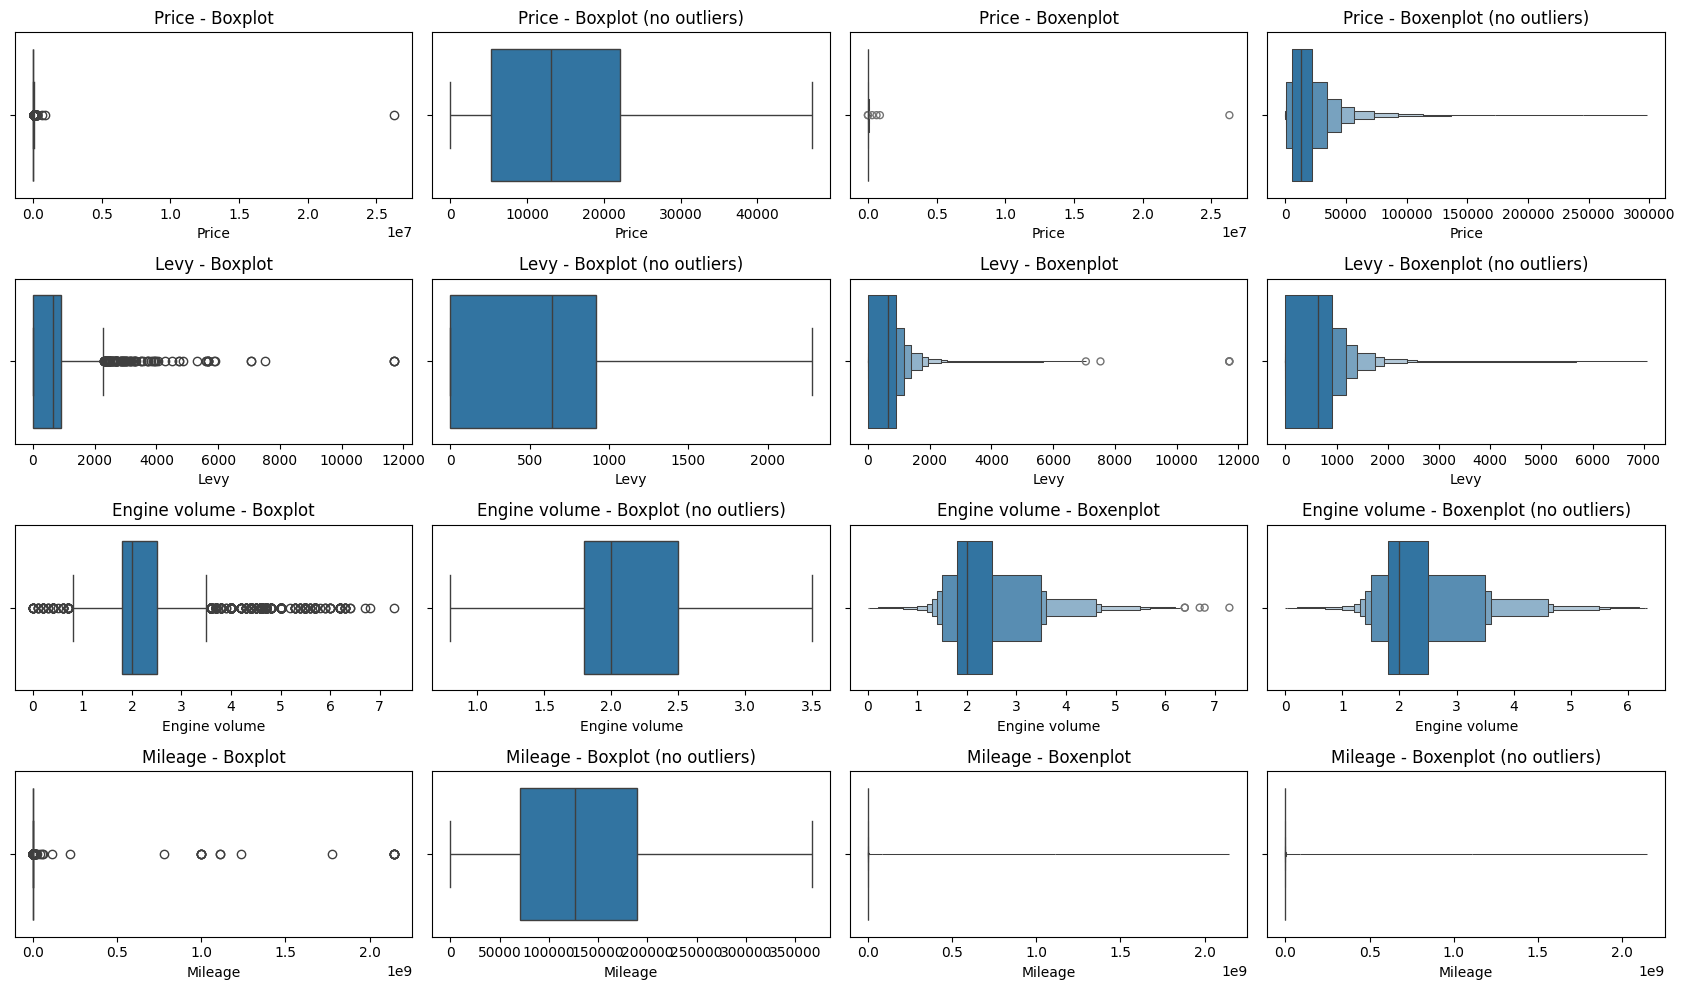

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

num_col = ['Price', 'Levy', 'Engine volume', 'Mileage']  # مثال للأعمدة العددية

fig, axes = plt.subplots(len(num_col), 4, figsize=(17, 10) ) # 4 رسم لكل عمود
axes = axes.reshape(len(num_col), 4)  # صفوف × 4 أعمدة

for i, col in enumerate(num_col):
    # الرسم الأول: Boxplot عادي
    sns.boxplot(x=df[col], ax=axes[i,0])
    axes[i,0].set_title(f"{col} - Boxplot")

    # الرسم الثاني: Boxplot بدون outliers
    sns.boxplot(x=df[col], ax=axes[i,1], showfliers=False)
    axes[i,1].set_title(f"{col} - Boxplot (no outliers)")

    # الرسم الثالث: Boxenplot
    sns.boxenplot(x=df[col], ax=axes[i,2])
    axes[i,2].set_title(f"{col} - Boxenplot")

    # الرسم الرابع: Boxenplot بدون outliers
    sns.boxenplot(x=df[col], ax=axes[i,3], showfliers=False)
    axes[i,3].set_title(f"{col} - Boxenplot (no outliers)")

plt.tight_layout()
plt.show()

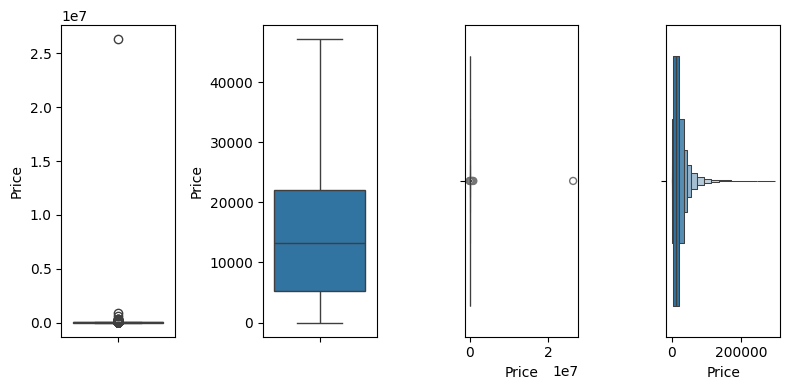

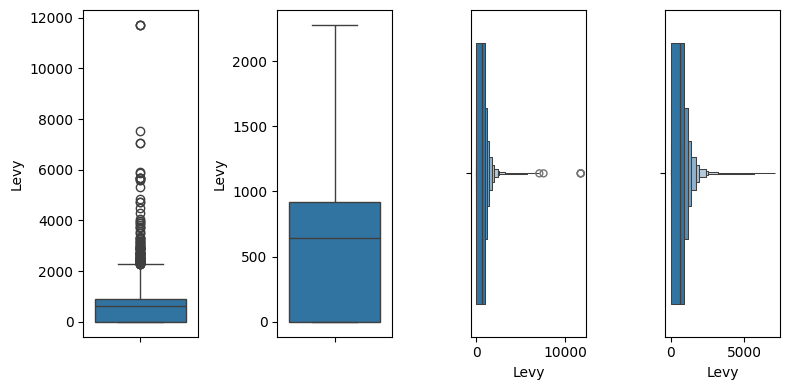

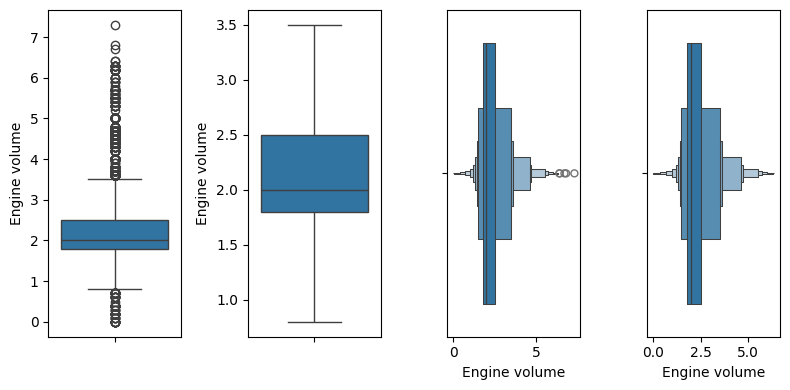

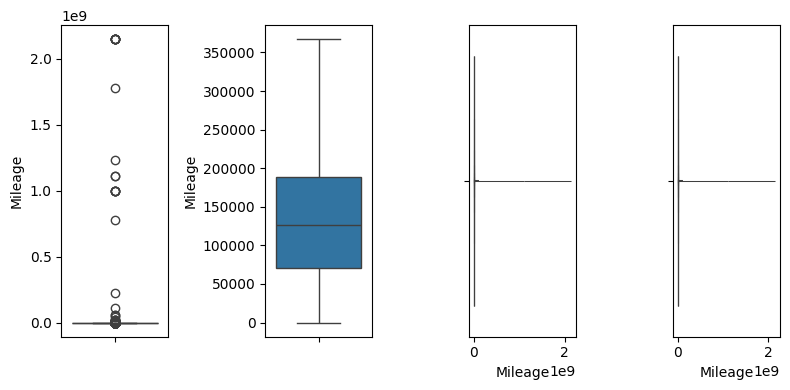

In [181]:
for ax , col in zip(axes ,num_col):

    fig,ax  = plt.subplots(1,4,figsize = (8,4))

    sns.boxplot(df[col] ,ax=ax[0] )
    sns.boxplot(df[col] ,ax=ax[1] ,showfliers=False)
    sns.boxenplot(x = df[col] , ax=ax[2])
    sns.boxenplot(x = df[col] , ax=ax[3] , showfliers=False)

    plt.tight_layout()
    plt.show()

<Axes: ylabel='Price'>

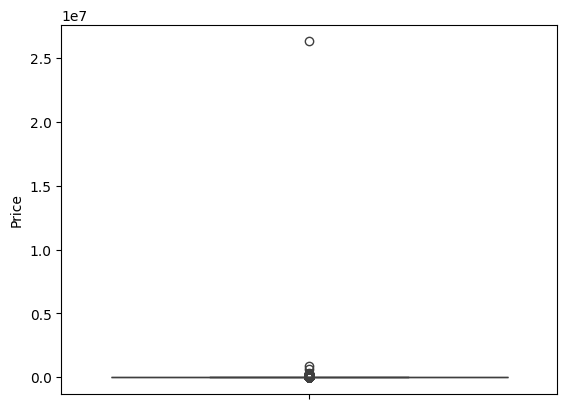

In [182]:
sns.boxplot(df['Price'])

In [183]:
df[df['Price']>=5e5]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
1225,45795524,627220,0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,1,Petrol,6.3,0,8.0,Tiptronic,4x4,Left wheel,Black,12
8541,45761204,872946,2067,LAMBORGHINI,Urus,2019,Universal,1,Petrol,4.0,2531,8.0,Tiptronic,4x4,Left wheel,Black,0
16983,45812886,26307500,0,OPEL,Combo,1999,Goods wagon,0,Diesel,1.7,99999,4.0,Manual,Front,Left wheel,Blue,0


<Axes: ylabel='Levy'>

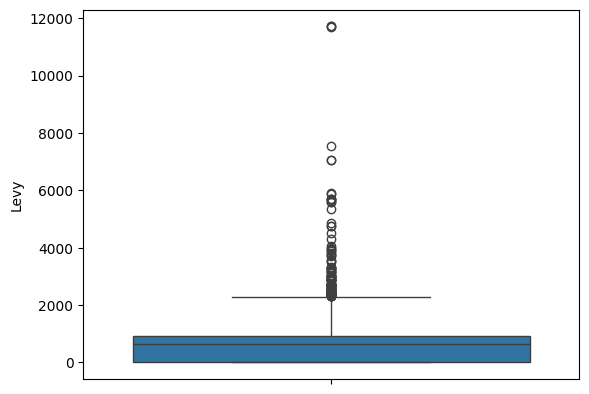

In [184]:
sns.boxplot(df['Levy'])

In [185]:
df[df['Levy'] > 3000].shape

(46, 17)

<Axes: ylabel='Mileage'>

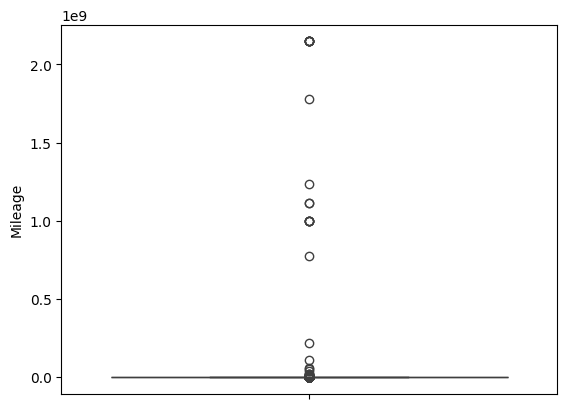

In [186]:
sns.boxplot(df['Mileage'])

In [187]:
df[df['Mileage'] > .25e9].shape

(17, 17)

In [188]:
def clean_outliers(df , col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_no_outliers

In [189]:
df = clean_outliers(df,'Price')
df = clean_outliers(df,'Levy')
df = clean_outliers(df,'Mileage')

In [190]:
df.shape

(17068, 17)


# 6. Target Variable Analysis

* Distribution of Target Variable (for class imbalance, decide if resampling or weighting is needed)
* Relationship with Predictors (scatter plots, box plots against the target)



In [191]:
df['Color'].value_counts().index

Index(['Black', 'White', 'Silver', 'Grey', 'Blue', 'Red', 'Green', 'Brown',
       'Carnelian red', 'Golden', 'Beige', 'Sky blue', 'Yellow', 'Orange',
       'Purple', 'Pink'],
      dtype='string', name='Color')

In [192]:
for col in df.select_dtypes('object').columns:
    top_categorical = df[col].value_counts().head(10).index
    filtered_df = df[df[col].isin(top_categorical)]

    plt.figure(figsize=(10,6))
    sns.boxplot(x = filtered_df[col] , y = filtered_df['Price'])
    plt.title(f'boxplot of {col} vs Price')
    plt.show()

In [193]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4


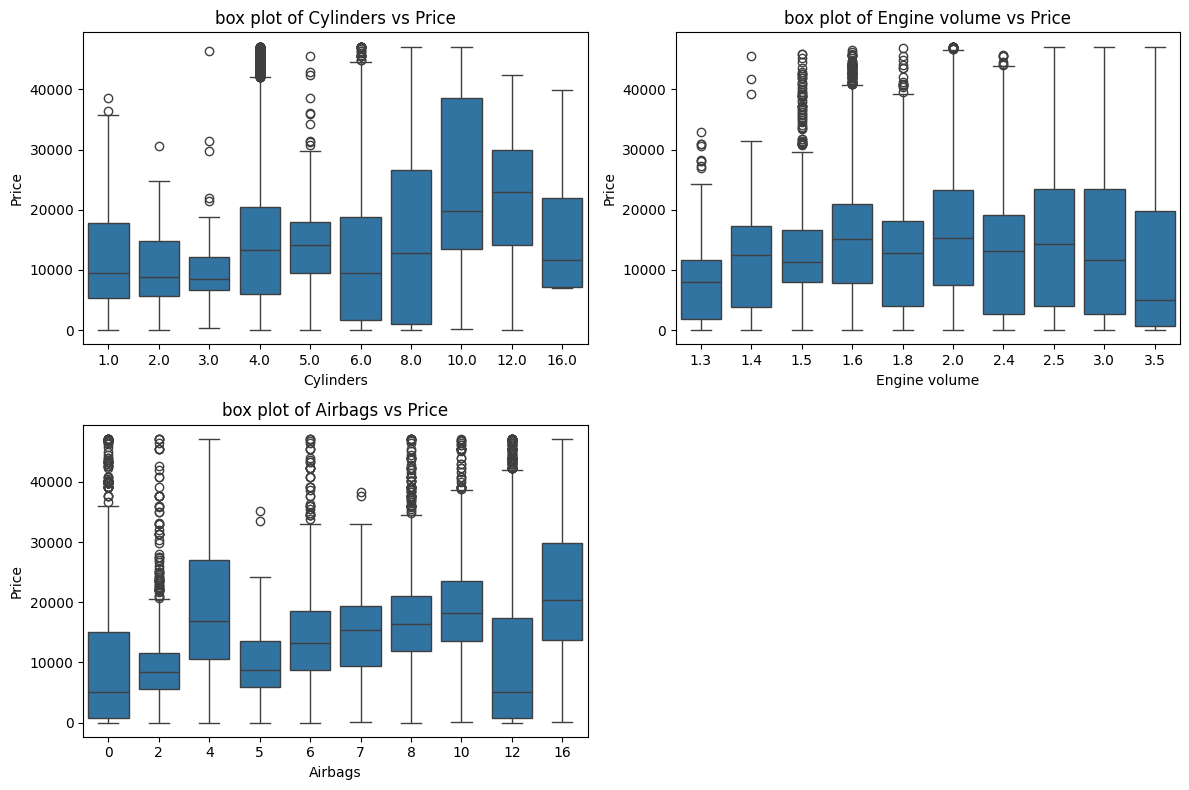

In [194]:
fig,axes = plt.subplots(2,2,figsize = (12,8))
axes = axes.reshape(-1)
for ax , col in zip (axes , ['Cylinders' , 'Engine volume' , 'Airbags']):
    top_categorical = df[col].value_counts().index[:10]
    filtered_df = df[df[col].isin(top_categorical)]

    sns.boxplot(x = filtered_df[col] , y= filtered_df['Price'] , ax=ax)
    ax.set_title(f'box plot of {col} vs Price')

for i in range(3, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [195]:
# df.to_csv("clean_car.csv", index=False)